In [1]:
name = "Su Wai Phyoe"
id = 2415655

In [2]:
# Select the data file based on your student ID
n = id % 5 # Take the modulo 5 of your student ID
num_list = [3, 4, 6, 8, 9] # List of numbers to select from
filename = f'./data/bidmc_{num_list[n]:02d}_Signals.csv'
print(f'Filename: {filename}')

Filename: ./data/bidmc_03_Signals.csv


In [4]:
# Run if needed
#!pip install numpy pandas matplotlib scipy

In [3]:
# Read necessary libraries and functions
import numpy as np                  # for numerical operations
import matplotlib.pyplot as plt     # for plotting
import pandas as pd                 # for reading data
from scipy.signal import find_peaks # for peak detection
import os                           # for file operations

In [20]:
# Print the list of files in the ./data directory
os.listdir('./data')

['bidmc_02_Fix.txt',
 'bidmc_02_Signals.csv',
 'bidmc_03_Fix.txt',
 'bidmc_03_Signals.csv',
 'bidmc_04_Fix.txt',
 'bidmc_04_Signals.csv',
 'bidmc_06_Fix.txt',
 'bidmc_06_Signals.csv',
 'bidmc_08_Fix.txt',
 'bidmc_08_Signals.csv',
 'bidmc_09_Fix.txt',
 'bidmc_09_Signals.csv']

In [9]:
# Read the data
data = pd.read_csv("bidmc_03_Signals.csv")

display(data.head())

# Check column names and data types
data.info()

# Check for missing values
display(data.isnull().sum())

### 5. Extract PPG Signal and Define Sampling Rate
fs = 125  # Sampling frequency in Hz (adjust if different)
ts = 0.008  # Sample time in seconds
ppg_signal = data.iloc[:, 1]  # Assuming PPG data is in the second column
t = np.arange(len(ppg_signal)) * ts


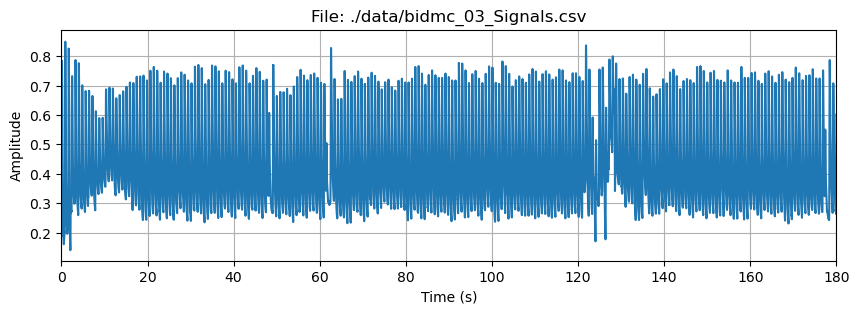

In [10]:
# Plot 180 seconds of the full signal
plt.figure(figsize = (10, 3))
plt.plot(t[:fs*180], ppg_signal[:fs*180], label="PPG Signal")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'File: {filename}')
plt.xlim(0, 180)
plt.grid()
plt.show()

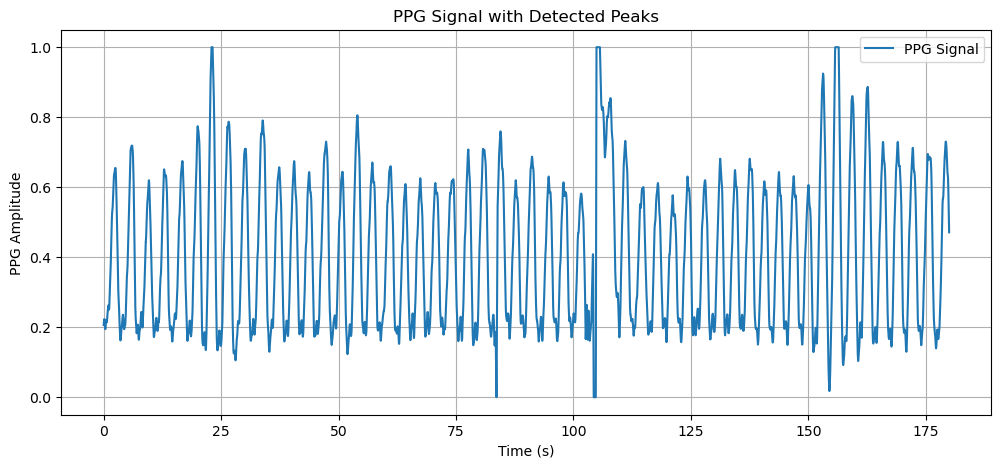

Mean PPI: 1483.74 ms
Mean HR: 40.44 BPM
SDNN: 373.05 ms
RMSSD: 462.31 ms


In [15]:
peaks, _ = find_peaks(ppg_signal, distance=fs*0.6)  # Minimum 0.6s gap (~100 BPM max)

### 8. Plot PPG Signal with Detected Peaks
plt.figure(figsize=(12, 5))
plt.plot(t[:int(fs*180)], ppg_signal[:int(fs*180)], label="PPG Signal")
valid_peaks = peaks[peaks < int(fs*180)]
plt.xlabel("Time (s)")
plt.ylabel("PPG Amplitude")
plt.title("PPG Signal with Detected Peaks")
plt.legend()
plt.grid()
plt.show()

### 9. Compute HRV Metrics
peak_times = peaks / fs  # Convert indices to seconds
pp_intervals = np.diff(peak_times) * 1000  # Convert to milliseconds (PPI)

mean_ppi = np.mean(pp_intervals)  # Mean PPI
mean_hr = 60000 / mean_ppi  # Mean HR in BPM
sdnn = np.std(pp_intervals)  # Standard deviation of PPI
rmssd = np.sqrt(np.mean(np.diff(pp_intervals) ** 2))  # RMSSD

### 10. Print HRV Analysis Results
print(f"Mean PPI: {mean_ppi:.2f} ms")
print(f"Mean HR: {mean_hr:.2f} BPM")
print(f"SDNN: {sdnn:.2f} ms")
print(f"RMSSD: {rmssd:.2f} ms")

In [18]:
# Remember to add your interpretations ...
print("\nInterpretation of Results:")

# Interpretation of Results

print("\nHeart Rate and Variability Analysis:")

print(f"Mean Heart Rate: {mean_hr:.2f} BPM")
if mean_hr < 60:
    print("The heart rate is lower than the normal resting range (60–100 BPM), which could indicate bradycardia. This might be normal for an athlete but could also suggest an underlying condition if symptoms are present.")
elif mean_hr > 100:
    print("The heart rate is above the normal resting range, which could be due to stress, dehydration, or other physiological factors.")
else:
    print("The heart rate falls within the normal range.")

print(f"Mean PPI: {mean_ppi:.2f} ms")
print("A higher PPI means a slower heart rate, while a lower PPI corresponds to a faster heart rate.")

print(f"SDNN: {sdnn:.2f} ms | RMSSD: {rmssd:.2f} ms")
print("Higher HRV values generally indicate better autonomic nervous system function. However, excessive variability could suggest irregular heart rhythms.")

print("\nConclusion:")
print("Overall, the results show a heart rate of {:.2f} BPM with HRV values of SDNN: {:.2f} ms and RMSSD: {:.2f} ms.".format(mean_hr, sdnn, rmssd))
print("These findings should be interpreted in the context of the individual's health and lifestyle.")



Interpretation of Results:

Heart Rate and Variability Analysis:
Mean Heart Rate: 40.44 BPM
The heart rate is lower than the normal resting range (60–100 BPM), which could indicate bradycardia. This might be normal for an athlete but could also suggest an underlying condition if symptoms are present.
Mean PPI: 1483.74 ms
A higher PPI means a slower heart rate, while a lower PPI corresponds to a faster heart rate.
SDNN: 373.05 ms | RMSSD: 462.31 ms
Higher HRV values generally indicate better autonomic nervous system function. However, excessive variability could suggest irregular heart rhythms.

Conclusion:
Overall, the results show a heart rate of 40.44 BPM with HRV values of SDNN: 373.05 ms and RMSSD: 462.31 ms.
These findings should be interpreted in the context of the individual's health and lifestyle.
